> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

## About Investigate a Dataset Medical Appointment No Shows

> The dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. It contains **110527** rows and **14** columns. The columns include:
**Gender, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received**, and **No-show**.
       

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

> The data has no missing values and duplicate value. While checking the data i found out that the **ScheduledDay** and **AppointmentDay** has the datatype object, i had to change it to datetime. Also, i went further to get the time difference in hours to be able to know how many hours it took a patient to see a doctor. Lastly, i dropped the **'PatientId', 'ScheduledDay','AppointmentDay','AppointmentID'** column.

In [2]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [3]:
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
## Rename columns
df.rename(columns = {'Handcap':'Handicap'}, inplace = True)
df.rename(columns = {'No-show':'NoShow'}, inplace = True)

In [5]:
df.shape

(110527, 14)

In [6]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])

In [7]:
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [8]:
df['DifferenceHour'] = (df['ScheduledDay'] - df['AppointmentDay']).astype('timedelta64[h]')

In [9]:
df.drop(['PatientId', 'ScheduledDay','AppointmentDay','AppointmentID'], inplace=True, axis=1)

In [10]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'DifferenceHour'],
      dtype='object')

In [11]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,DifferenceHour
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18.0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16.0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,16.0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17.0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Gender          110527 non-null  object 
 1   Age             110527 non-null  int64  
 2   Neighbourhood   110527 non-null  object 
 3   Scholarship     110527 non-null  int64  
 4   Hipertension    110527 non-null  int64  
 5   Diabetes        110527 non-null  int64  
 6   Alcoholism      110527 non-null  int64  
 7   Handicap        110527 non-null  int64  
 8   SMS_received    110527 non-null  int64  
 9   NoShow          110527 non-null  object 
 10  DifferenceHour  110527 non-null  float64
dtypes: float64(1), int64(7), object(3)
memory usage: 9.3+ MB


In [13]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,DifferenceHour
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,-233.634325
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,365.862800
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4286.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-344.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-84.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,157.000000


In [14]:
# Number of neighbourhood that benefited from the appointment in Brazil
df['Neighbourhood'].nunique()

81

In [15]:
df[df['DifferenceHour'] == -4286.0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,DifferenceHour
102786,M,67,MARUÍPE,0,1,1,0,0,0,No,-4286.0
102788,F,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,-4286.0
102789,F,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,-4286.0
102790,M,73,MARUÍPE,0,1,1,0,0,0,No,-4286.0
102791,F,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,-4286.0
102792,M,73,MARUÍPE,0,1,1,0,1,0,Yes,-4286.0
102795,F,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,Yes,-4286.0
102796,F,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,-4286.0
102797,F,48,MARUÍPE,0,1,1,0,0,1,No,-4286.0
102799,F,74,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,-4286.0


In [16]:
df['Age'].max()

115

In [17]:
df[df['Age'] == -1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,DifferenceHour
99832,F,-1,ROMÃO,0,0,0,0,0,0,No,8.0


In [18]:
""" We have an outlier in the min Age column which is -1.
    There no one on earth with the min Age of -1. I will drop the row
"""
df.drop(99832, inplace=True, axis=0)

In [19]:
""" To better understand the age category of each patient, i will like to assign each age in ranges.
"""

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels = ['0-10', '11-20', '21-30', '31-40', '41-40', '51-60', '61-70','71-80', '81-90', '91-100', '101-110', '111-120']
df['Age_range'] = pd.cut(df['Age'], bins, labels = labels)

In [20]:
# drop Age colunm
df.drop('Age', inplace=True, axis=1)

In [21]:
df.columns

Index(['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'NoShow', 'DifferenceHour',
       'Age_range'],
      dtype='object')

In [22]:
df.head(5)

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,DifferenceHour,Age_range
0,F,JARDIM DA PENHA,0,1,0,0,0,0,No,18.0,61-70
1,M,JARDIM DA PENHA,0,0,0,0,0,0,No,16.0,51-60
2,F,MATA DA PRAIA,0,0,0,0,0,0,No,16.0,61-70
3,F,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17.0,0-10
4,F,JARDIM DA PENHA,0,1,1,0,0,0,No,16.0,51-60


In [23]:
""" Counts of each Age range captured in the medical data. It shows data age range 51-60 have the highest patients, followed by 0-10.
"""
df['Age_range'].value_counts()

51-60      15661
0-10       15210
31-40      15052
41-40      14420
21-30      13783
11-20      13099
61-70      11189
71-80       5721
81-90       2544
91-100       301
111-120        5
101-110        2
Name: Age_range, dtype: int64

In [24]:
present = df['NoShow'] == "Yes"
absent = df['NoShow'] == "No"

## Function

The two functions below does two different things
1. The first function get the number of patient that received the social welfare scholarship for each category eg hipertension etc
2. Then the second function gets the number of all those who received the scholarship and showed up for the appointed for each category.

In [25]:
# (df.groupby('Neighbourhood')['Diabetes'].sum()).nunique()

def scholars(df1, col1, col2):
    result = df.groupby(col1)[col2].sum()[1]
    return result

In [26]:
# Diabetic patient that recived the scholarship
scholars(df, 'Scholarship','Diabetes')

569

In [27]:
# Diabetic Hipertensive patient that recived the scholarship
scholars(df, 'Scholarship','Hipertension')

1884

In [28]:
# Diabetic Handicap patient that recived the scholarship
scholars(df, 'Scholarship','Handicap')

196

In [29]:
# Diabetic Alcoholic patient that recived the scholarship
scholars(df, 'Scholarship','Alcoholism')

528

In [30]:
# function to get the scholar that were present
def present_scholars(df1, col1, col2):
    result = df[present].groupby(col1)[col2].sum()[1]
    return result

In [31]:
# Diabetic patient that recived the scholarship
present_scholars(df, 'Scholarship','Diabetes')

123

In [32]:
# Diabetic patient that recived the scholarship
present_scholars(df, 'Scholarship','Hipertension')

372

In [33]:
# Diabetic patient that recived the scholarship
present_scholars(df, 'Scholarship','Handicap')

29

In [34]:
# Diabetic patient that recived the scholarship
present_scholars(df, 'Scholarship','Alcoholism')

149

In [35]:
# the number of male and female that were beneficiary
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [36]:
df[['Scholarship', 'Hipertension', 'Diabetes','Alcoholism', 'Handicap']].sum()

Scholarship     10861
Hipertension    21801
Diabetes         7943
Alcoholism       3360
Handicap         2459
dtype: int64

In [37]:
""" 81 neighbourhoods benefited from the medical appointments in Brazil 
"""
df['Neighbourhood'].nunique()

81

In [38]:
""" 10861 scholarships were awarded by the Brazil government between 2015 and 2016
"""
df['Scholarship'].sum()

10861

In [39]:
""" In this dataset, 66 neighbourhood benefit from the medical appointments in Brazil.
    Now, we want to find out, how many neighbour got the scholarship.
    Out of 81 neighbourhood, 79 got from the scholarship.
"""
(df.groupby('Neighbourhood')['Scholarship'].count()).nunique()

79

In [40]:
""" 66 neighbourhoods in Brazil are diabetic
"""
(df.groupby('Neighbourhood')['Diabetes'].sum()).nunique()

66

In [41]:
""" 75 neighbourhoods in Brazil are Hipentensive
"""
(df.groupby('Neighbourhood')['Hipertension'].sum()).nunique()

75

In [42]:
""" 52 neighbourhoods in Brazil are suffering from Alcoholism
"""
(df.groupby('Neighbourhood')['Alcoholism'].sum()).nunique()

52

In [43]:
""" 52 neighbourhoods in Brazil are suffering from Alcoholism
"""
(df.groupby('Neighbourhood')['Handicap'].sum()).nunique()

46

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (I am investigating the Age Range of the featuerd Ailment)

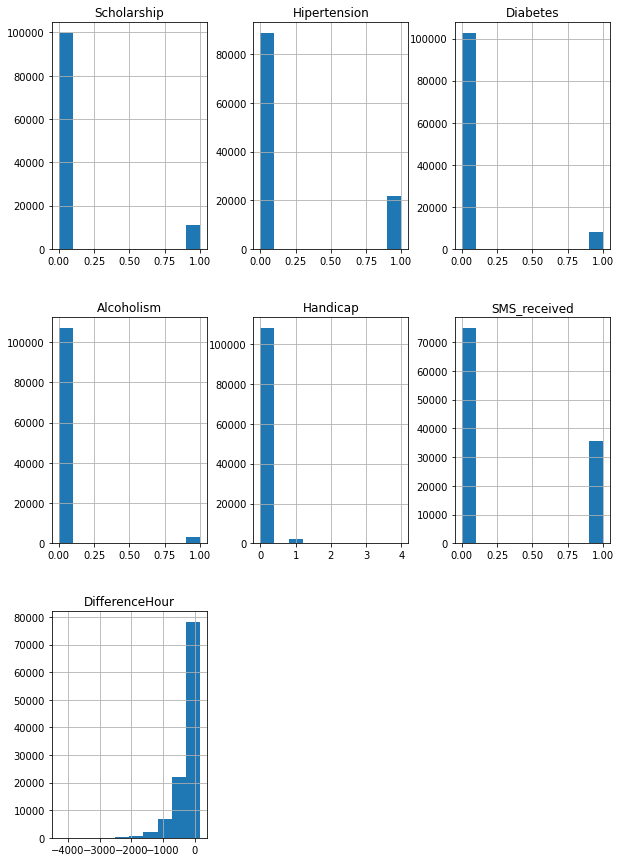

In [44]:
# The distribution of the features is between 0 and 1 as can be seen in the hist below
# Except for rge date difference in hour that is having negative values and i don't know why
# I got that feature from substrcting ScheduledDate with AppointmentDate

df.hist(figsize=(10,15));

In [45]:
df.Diabetes[present].mean()

0.06407097092163627

In [46]:
# we have diabetic patient who were absent than present
df.Diabetes[absent].mean()

0.07383767728184838

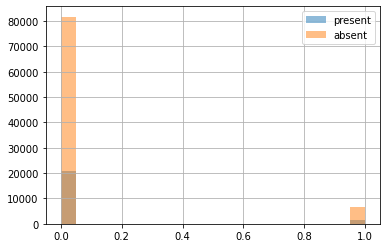

In [47]:
# the number of patient who are diabetic and that did not show up for appoint is highier
# than number of patient who are diabetic and that showed up is low. from chart, it is not visible.

df.Diabetes[present].hist(alpha=0.5, bins=20,label='present')
df.Diabetes[absent].hist(alpha=0.5, bins=20,label='absent')
plt.legend();

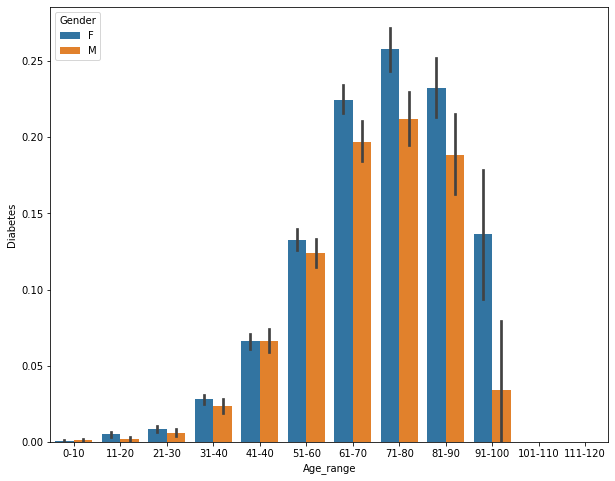

In [48]:
# I want to investigate the Age range for diabetic patient in male and female
# from the chart, the age range of 71-80 are living with diabetes with more female than male

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x = 'Age_range', y = 'Diabetes', hue='Gender', data=df, ax = ax);

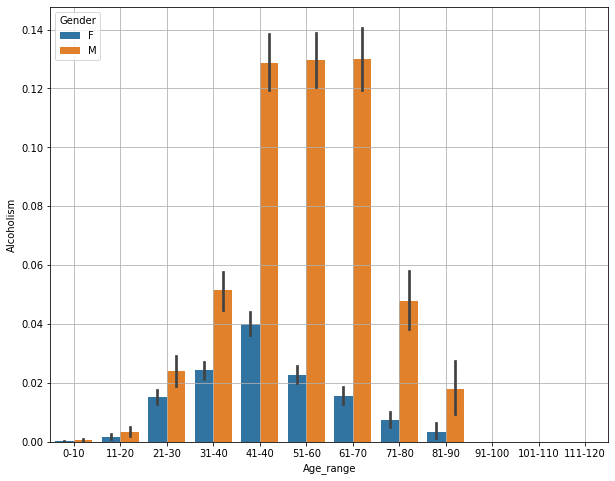

In [49]:
# I want to investigate the Age range for Alcoholism patient in male and female
# from the chart, the age range of 61-70 are living with Alcoholism with more male than female

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = 'Age_range', y = 'Alcoholism', hue='Gender', data=df, ax = ax);
plt.grid()

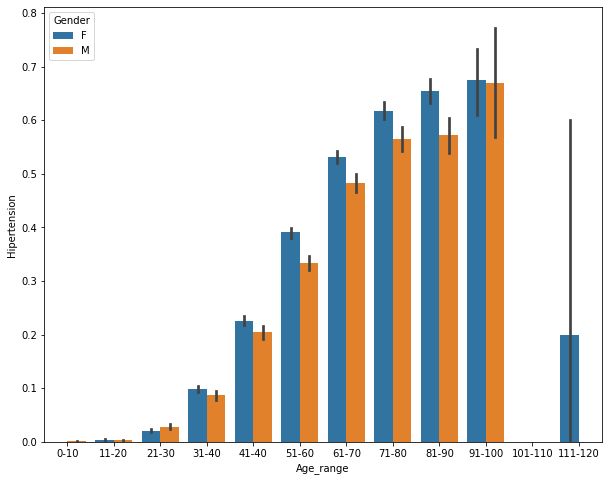

In [50]:
# I want to investigate the Age range for Hipertension patient in male and female
# from the chart, the age range of 91-100 are living with Hipertension with both genders almost same
# These goes to show that both genders suffers from hipertension

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x = 'Age_range', y = 'Hipertension', hue='Gender', data=df, ax = ax);

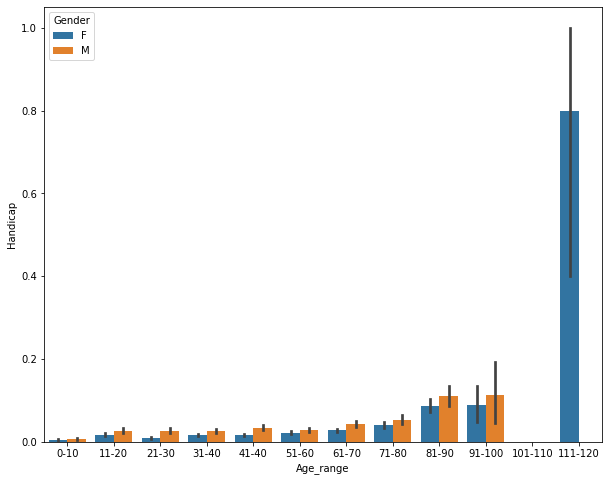

In [51]:
# I want to investigate the Age range for Handcap patient in male and female
# from the chart, the age range of 111-120 have the highest values of people that are Handcap
# And the famale in that range. Looking at the other age ranges we have male Gender dominating
# But in the range 111-120, male gender can't be found

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = 'Age_range', y = 'Handicap', hue='Gender', data=df, ax = ax);

### Findings

From the Data, we can conclude the following:
1. Male Gender suffers more from alcoholism from the age -range of 61-70.
2. Female Gender suffers more from Hpertension from the age range of 91-100.
3. Female Gender suffers more from Daibetics from the age range of 71-80.
4. Male Gender are more Handicap.

### Research Question 2  (Top 10 neighbourhood that benefited from the appointment)

In [52]:
neighbour_name = df.Neighbourhood.value_counts().index

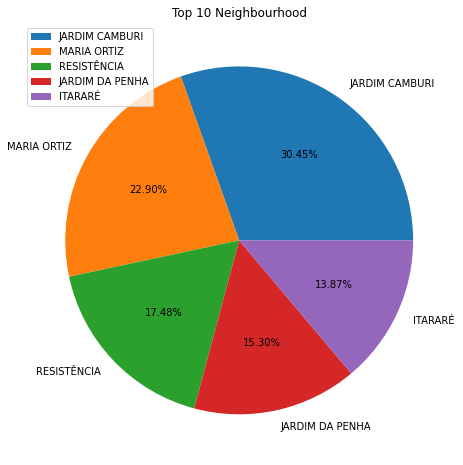

In [53]:
# top 10 neighbourhood that benefited
top_10 = df.Neighbourhood.value_counts().values

fig, ax = plt.subplots(figsize=(10, 8))
plt.pie(top_10[:5], labels=neighbour_name[:5], autopct= '%1.2f%%');
plt.legend(loc ="upper left");
ax.set(title ="Top 10 Neighbourhood");

## Top 10  neighborhood that were beeficiary are:
1. JARDIM CAMBURI - Highest
2. MARIA ORTIZ
3. RESRSTENCIA
4. JARDIM DA PENHA
5. ITARARE

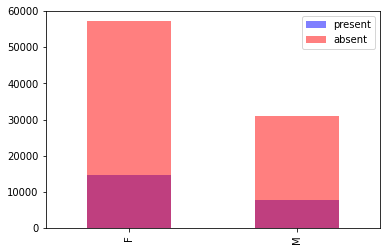

In [54]:
# Fenale gender have more absentee than male. This is because more female booked for appointment to see the doctor than male
df.Gender[present].value_counts().plot(kind='bar', color = 'blue', alpha=0.5, label= 'present')
df.Gender[absent].value_counts().plot(kind='bar', color = 'red', alpha=0.5, label= 'absent')
plt.legend();

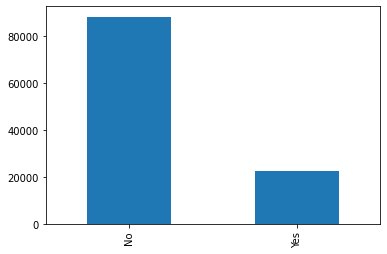

In [55]:
# More people did not show up for the appointment
df.NoShow.value_counts().plot(kind='bar');

In [56]:
Received = df['Scholarship'] == 1
Not_Received = df['Scholarship'] == 0

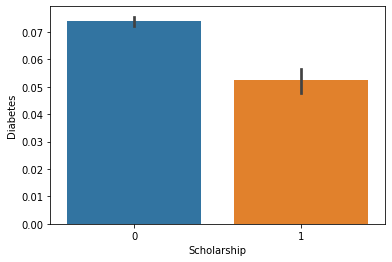

In [57]:
sns.barplot(x = "Scholarship",y="Diabetes",data=df);

In [58]:
df.columns

Index(['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'NoShow', 'DifferenceHour',
       'Age_range'],
      dtype='object')

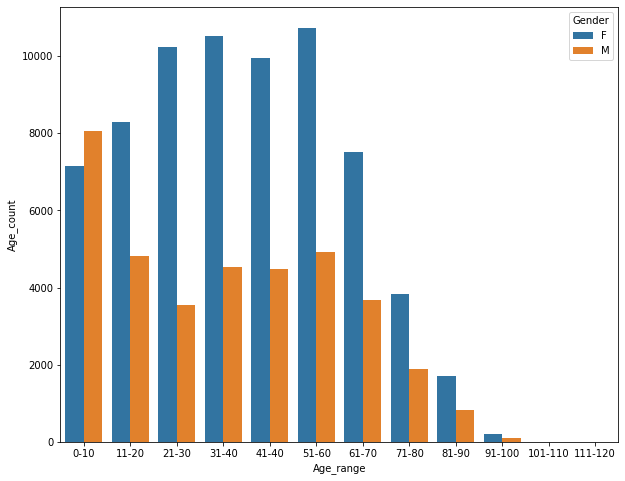

In [72]:
# The age Range of both Gender

age = df.groupby(['Gender','Age_range']).size().reset_index().rename(columns={0:'Age_count'})

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x="Age_range",y="Age_count", hue = "Gender",data=age, ax=ax);

<a id='conclusions'></a>
## Conclusions

The data is from a social welfare program organize by the Brazilain government called Bolsa Família. It is a program organized to provide financial aid to poor Brazilian families. The following are my findings:

1. **110527** registered for the welfare program among which were **71839** female and **38687** male
2. **81** Neighourhood benefited from the social welfare program. 
3. We have a total of **10861** people that received the scholarship.
4. From the **110527** people that registered for the program, **21801** were hipertensive, **7943** were Diabetic, **2459** were handicap and **3360** suffered from alcholism.
5. Of **21801** people who had hypertension, **1884** received a scholarship. And of the **1884** who received the scholarship, **372** showed up for a doctor's appointment.
6. Of **7943** diabetic patient, **569** received a scholarship. And of the **569** who received the scholarship, **123** showed up for a doctor's appointment.
7. Of **2459** handicap patient, 196 received a scholarship. And of the **196** who received the scholarship, **29** showed up for a doctor's appointment.
8. Of **3360** alcoholic patient, **528** received a scholarship. And of the **528** who received the scholarship, **149** showed up for a doctor's appointment.
9. More Feamle participated in this program than male
